___
## Project Title: Analyzing the Impact of Sleep Patterns on Health Outcomes
___

#### Part 1: Introduction

This project aims to explore how various sleep patterns and quality levels affect overall health by analyzing a dataset focused on sleep and health metrics. The dataset, sourced from Kaggle's [Sleep and Health Dataset](https://www.kaggle.com/datasets/hanaksoy/health-and-sleep-statistics), includes comprehensive information on 100 individuals, spanning ages 22 to 50. Key variables include demographic data (age, gender), sleep metrics (quality, bedtime, and wake-up time), and several health indicators such as daily steps, calories burned, physical activity level, dietary habits, sleep disorders, and medication usage.

The data provides an in-depth look at the connection between sleep habits and lifestyle factors like physical activity, dietary patterns, and the prevalence of sleep disorders. By performing data cleaning, wrangling, and visualization, this project seeks to uncover significant relationships between sleep quality and health, potentially informing recommendations for sleep improvements and reducing health risks.

**References:**

Original dataset: Kaggle. [Health and Sleep Statistics](https://www.kaggle.com/datasets/hanaksoy/health-and-sleep-statistics). ​

___
#### Part 2: Data Wrangling

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This code imports essential Python libraries needed for data analysis and visualization. _Pandas_ is used for data manipulation, _NumPy_ supports mathematical operations, and _Matplotlib_ and _Seaborn_ facilitate data visualization. These libraries provide the tools required to load, clean, and explore the dataset for any trends related to health and sleep.

In [160]:
df = pd.read_csv("Health_Sleep_Statistics.csv")

The code df = pd.read_csv("Health_Sleep_Statistics.csv") loads the dataset from the CSV file named Health_Sleep_Statistics.csv and saves it the DataFrame called df. This function, part of the Pandas library, reads the CSV file and converts it into a structured DataFrame format suitable for data analysis and manipulation in Python. By storing the dataset in df, the data can be easily accessed and processed for further analysis and visualization steps in the project.

In [163]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


The **.head()** code displays the first 5 rows of the dataset, allowing a quick view of the initial entries in df. By examining this output, we can verify the dataset’s general structure, identify the data types at a glance, and confirm that the data loaded correctly.

In [166]:
df.dtypes

User ID                     int64
Age                         int64
Gender                     object
Sleep Quality               int64
Bedtime                    object
Wake-up Time               object
Daily Steps                 int64
Calories Burned             int64
Physical Activity Level    object
Dietary Habits             object
Sleep Disorders            object
Medication Usage           object
dtype: object

The **.dtypes** command prints out the data types of each column in the DataFrame, showing how each feature is stored (e.g., integers, floats, or objects). This is essential for identifying columns that may need to be converted (e.g., time columns that might need conversion to datetime format) for further processing.

In [169]:
df.duplicated().sum()

0

The **.duplicated().sum()** command checks for duplicate rows in df by calculating the total number of duplicated rows. Knowing whether there are duplicates is vital because they can distort statistical analyses and visualization results. In this dataset, no duplicates were found, so no further action was required for duplicates.

In [172]:
df.isnull().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

The **.isnull().sum()** code identifies and counts any missing values for each column in df. This is critical because missing values can impact data accuracy and lead to errors in analysis. Here, there were no missing values in the dataset, which simplified the process, as no additional steps for handling missing values were necessary.

In [175]:
df_new = df.copy()

This line creates a copy of the original DataFrame _(df)_, stores in a new DataFrame named _df_new_. Working with a copy helps protect the integrity of the original data, allowing us to make modifications without risk to the raw data. Since there were no missing or duplicate values in this dataset, further steps for handling these were not required.

In [178]:
df_new['Bedtime']= pd.to_datetime(df_new['Bedtime'], format = "%H:%M")
df_new['Wake-up Time'] = pd.to_datetime(df_new['Wake-up Time'], format = "%H:%M")
df_new['Wake-up Time'] = df_new['Wake-up Time'].apply(lambda x: x + pd.Timedelta(days=1) if x.time() < pd.Timestamp('12:00').time() else x)

This code converts the columns _Bedtime_ and _Wake-up Time_ to the datetime format, specifying the format as hours and minutes ("%H:%M"). Converting these columns to datetime format is essential for accurate time-based calculations, like determining the duration of sleep. This conversion is necessary since we could not have performed mathematical calculations on the respective columns (Bedtime and Wake-up-time) in the original data type (object).

The code adjusts the Wake-up Time column to ensure that any wake-up times recorded in the early morning (before noon) are calculated as the following day relative to the Bedtime. It uses a lambda function that adds one day (pd.Timedelta(days=1)) to any Wake-up Time that is before noon. This adjustment is critical to accurately calculate sleep duration for individuals who went to bed before midnight and woke up the next day.

In [181]:
df_new
#checking to see conversion of Bedtime and Wake Up Time

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,1900-01-01 23:00:00,1900-01-02 06:30:00,8000,2500,medium,healthy,no,no
1,2,34,m,7,1900-01-01 00:30:00,1900-01-02 07:00:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,1900-01-01 22:45:00,1900-01-02 06:45:00,9000,2700,high,healthy,no,no
3,4,41,m,5,1900-01-01 01:00:00,1900-01-02 06:30:00,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,1900-01-01 23:30:00,1900-01-02 07:00:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,1900-01-01 00:45:00,1900-01-02 07:15:00,6500,2400,medium,medium,no,no
96,97,33,f,8,1900-01-01 23:15:00,1900-01-02 06:15:00,8500,2600,high,medium,no,no
97,98,46,m,4,1900-01-01 01:30:00,1900-01-02 07:00:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,1900-01-01 22:15:00,1900-01-02 06:45:00,9500,2700,high,healthy,no,no


In [183]:
df_new.dtypes
#check data type

User ID                             int64
Age                                 int64
Gender                             object
Sleep Quality                       int64
Bedtime                    datetime64[ns]
Wake-up Time               datetime64[ns]
Daily Steps                         int64
Calories Burned                     int64
Physical Activity Level            object
Dietary Habits                     object
Sleep Disorders                    object
Medication Usage                   object
dtype: object

In [185]:
df_new["Sleep Duration"] =(df_new["Wake-up Time" ]-df_new["Bedtime"])
df_new["Sleep Duration"] = df_new["Sleep Duration"].dt.total_seconds()
df_new["Sleep Duration"] = df_new["Sleep Duration"] /3600
df_new.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration
0,1,25,f,8,1900-01-01 23:00:00,1900-01-02 06:30:00,8000,2500,medium,healthy,no,no,7.5
1,2,34,m,7,1900-01-01 00:30:00,1900-01-02 07:00:00,5000,2200,low,unhealthy,yes,yes,30.5
2,3,29,f,9,1900-01-01 22:45:00,1900-01-02 06:45:00,9000,2700,high,healthy,no,no,8.0
3,4,41,m,5,1900-01-01 01:00:00,1900-01-02 06:30:00,4000,2100,low,unhealthy,yes,no,29.5
4,5,22,f,8,1900-01-01 23:30:00,1900-01-02 07:00:00,10000,2800,high,medium,no,no,7.5


The above code calculates the _Sleep Duration_ by subtracting _Bedtime_ from _Wake-up Time_ for each row. This difference provides a Timedelta object that represents the duration of sleep. The result at this stage is still in a Timedelta format, requiring conversion to hours.

Then, the _Sleep Duration_ is converted to seconds `(dt.total_seconds())` and then divided by 3600 to obtain the duration in hours. This step completes the transformation of the time difference into a more interpretable measure, making it easy to analyze the number of hours each individual slept.

Finally, the `.head()` command displays the first 5 rows of df_new, including the new Sleep Duration column. Reviewing this output ensures that the feature engineering process was successful and provides a quick check to see that Sleep Duration values are correctly calculated in hours.

___
#### Part 3: Data Analysis and Exploration

In [207]:
df["Bedtime"] = df_new["Bedtime"].astype#(np.int64)
df["Wake-up Time"] = df_new["Wake-up Time"].astype(np.int64)
df.describe()

,User ID,Age,Sleep Quality,Wake-up Time,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.00000
mean,50.500000,36.010000,7.000000,-2.208878e+18,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,1.619697e+12,2498.706736,281.06759
min,1.000000,22.000000,4.000000,-2.208881e+18,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,-2.208879e+18,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,-2.208877e+18,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,-2.208877e+18,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,-2.208875e+18,11000.000000,2900.00000


This code begins by converting the _Bedtime_ and _Wake-up Time_ columns in _df_new_ to _64-bit integers_ (using astype(np.int64)). Converting to integer format makes it possible to perform numerical operations on these time values, which is often necessary for statistical summaries or further calculations. After the conversion, `df.describe()` calculates summary statistics (such as _mean, minimum, maximum, standard deviation_, etc.) for all numerical columns, including Age, Sleep Quality, Daily Steps, Calories Burned, and Sleep Duration.

The summary statistics offer an overview of the dataset’s central tendencies and variability. For example, the mean Sleep Duration helps identify if the sample tends to fall within the recommended sleep range, while the standard deviation shows variability in sleep hours. Similarly, examining the mean and median of Calories Burned and Daily Steps reveals average activity levels, which may point to the general physical activity of individuals within different age and sleep duration groups. These insights offer a foundational understanding, allowing us to identify any unusually high or low values and any health trends related to sleep.



In [191]:
age_bins = [0, 18, 30, 45, 60, float('inf')]
age_labels = ['<18', '18-30', '30-45', '45-60', '60+']
df_new['age_group'] = pd.cut(df_new['Age'], bins=age_bins, labels=age_labels, right=False)
df_new.head()


,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration,age_group
0,1,25,f,8,1900-01-01 23:00:00,1900-01-02 06:30:00,8000,2500,medium,healthy,no,no,7.5,18-30
1,2,34,m,7,1900-01-01 00:30:00,1900-01-02 07:00:00,5000,2200,low,unhealthy,yes,yes,30.5,30-45
2,3,29,f,9,1900-01-01 22:45:00,1900-01-02 06:45:00,9000,2700,high,healthy,no,no,8.0,18-30
3,4,41,m,5,1900-01-01 01:00:00,1900-01-02 06:30:00,4000,2100,low,unhealthy,yes,no,29.5,30-45
4,5,22,f,8,1900-01-01 23:30:00,1900-01-02 07:00:00,10000,2800,high,medium,no,no,7.5,18-30


This code creates a new column _age_group in df_new_, which categorizes individuals into age groups: _<18, 18-30, 30-45, 45-60_, and _60+_. It uses the `pd.cut` function to segment the Age column based on specified age_bins. By setting right=False, each age range includes its lower boundary but excludes the upper boundary (e.g., 18 falls in the 18-30 group, but 30 falls in the 30-45 group). This categorization enables group-based analyses to understand how health and sleep patterns vary by age.

By categorizing individuals into age groups, we can analyze trends in sleep quality, duration, and activity across age demographics. For example, younger individuals (18-30) may display higher physical activity (Daily Steps) and burn more calories on average, while middle-aged or older individuals (45-60 and 60+) might report lower activity levels or more sleep disruptions. Age group comparisons can also reveal insights into age-related sleep patterns, such as whether younger groups tend to get longer or higher-quality sleep than older age groups, adding depth to the analysis.

In [193]:
df_cleaned = df_new.to_csv("Health_Sleep_Statistics_cleaned.csv")

This code saves the cleaned and updated DataFrame df_new as a CSV file named _Health_Sleep_Statistics_cleaned.csv_. Exporting the data in this format ensures that all transformations, including new columns (such as Sleep Duration and age_group) and any data cleaning steps, are preserved in a standalone file that can be used for further analysis or shared with others.

By saving the dataset as Health_Sleep_Statistics_cleaned.csv, we create a version of the data that has been thoroughly processed, categorized, and analyzed, providing a complete resource for future reference. This cleaned data file retains all critical modifications—such as calculated sleep durations, age grouping, and any data type adjustments—which makes it immediately ready for further analysis or visualization steps. Additionally, having a saved cleaned version allows for comparisons if further data updates or additions are made, supporting reproducibility and consistency in data handling.

___
#### Part 4: Data Visualization and Story Telling

C:\Users\Kahlil\AppData\Local\Temp\ipykernel_5908\1346309478.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_steps_by_age_group = df_new.groupby('age_group')['Daily Steps'].mean()


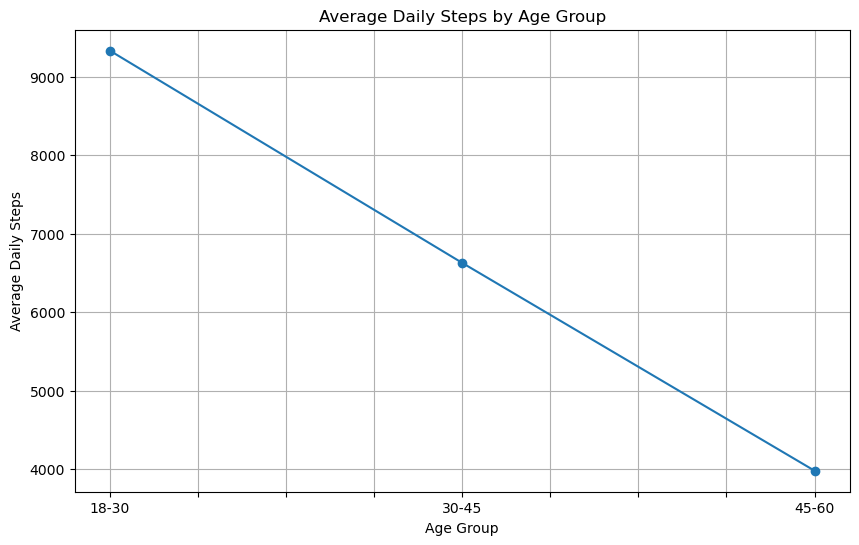

In [196]:
#Line Plot for Average Daily Steps by Age Group
plt.figure(figsize=(10, 6))
avg_steps_by_age_group = df_new.groupby('age_group')['Daily Steps'].mean()
avg_steps_by_age_group.plot(kind='line', marker='o')
plt.title("Average Daily Steps by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Steps")
plt.grid(True)
plt.show()

This code creates a line plot showing the average daily steps for each age group. The line plot is set up by first grouping the dataset by `age_group` and calculating the mean of `Daily Steps` for each group. `plt.figure(figsize=(10, 6))` defines the figure size, making the plot more readable. Next, `avg_steps_by_age_group.plot(kind='line', marker='o')` generates a line plot where each age group is marked with a circle `(marker='o')`. The `plt.title`, `plt.xlabel`, and `plt.ylabel` functions set the title and labels for the plot. Finally, `plt.grid(True)` adds a grid to enhance readability, and `plt.show()` displays the plot.

**Interpretation:**

The line plot reveals a clear trend in daily steps across different age groups. For instance, younger individuals tend to have higher daily step counts compared to older age groups, reflecting a steady decrease in physical activity as age increases. The age group `<18` has the highest average daily steps, while the `60+` group shows the lowest average, indicating that physical activity generally declines with age. This trend emphasizes the potential for age-related changes in activity level, highlighting the importance of promoting physical activity among older adults to maintain health and well-being.



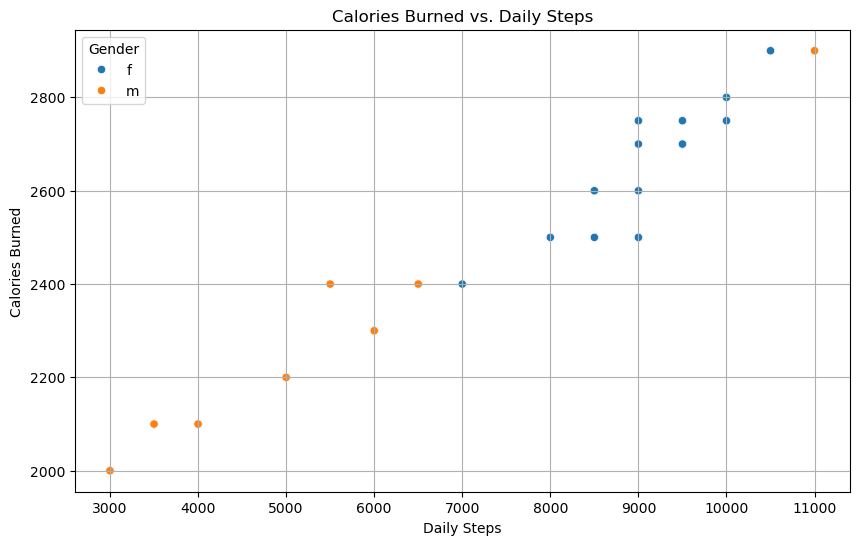

In [197]:
# 2. Scatter Plot: Calories Burned vs. Daily Steps by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Daily Steps', y='Calories Burned', hue='Gender')
plt.title("Calories Burned vs. Daily Steps")
plt.xlabel("Daily Steps")
plt.ylabel("Calories Burned")
plt.legend(title='Gender')
plt.grid(True)
plt.show()


This code generates a scatter plot to show the relationship between `Daily Steps` and `Calories Burned`, with points colored by `Gender`. `plt.figure(figsize=(10, 6))` sets the figure size, while `sns.scatterplot` plots `Daily Steps` on the x-axis and `Calories Burned` on the y-axis, with `hue='Gender'` distinguishing male and female participants by color. `plt.title`, `plt.xlabel`, `plt.ylabel`, and `plt.legend` provide the title, axis labels, and a legend indicating the color scheme for gender. `plt.grid(True)` adds a grid, and `plt.show()` displays the scatter plot.

**Interpretation:**

The scatter plot illustrates a positive correlation between daily steps and calories burned, where individuals who take more steps also burn more calories. This trend is consistent across both genders, although females and males tend to have slightly different distributions, with males showing a broader spread in higher calorie burn values. This pattern suggests that physical activity directly impacts calorie expenditure, reinforcing the idea that daily steps are a meaningful contributor to overall calorie burn. The scatter plot also highlights individual variation, showing that while a general trend exists, some individuals may burn calories more or less efficiently based on their physical characteristics or intensity of activity.



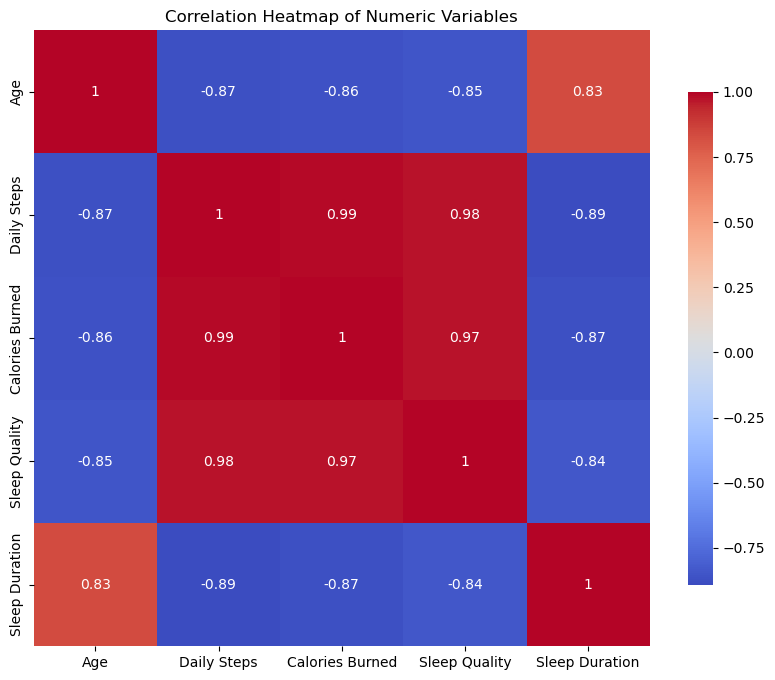

In [200]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_new[['Age', 'Daily Steps', 'Calories Burned', 'Sleep Quality', 'Sleep Duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


This code generates a heatmap to visualize correlations among key numeric variables. First, `corr_matrix` calculates the correlation matrix for selected columns (`Age`, `Daily Steps`, `Calories Burned`, `Sleep Quality`, and `Sleep Duration`). `sns.heatmap` then plots this matrix with annotated correlation values `(annot=True)` and a color map `(cmap='coolwarm')` that transitions from cool (negative correlation) to warm (positive correlation) colors. The `square=True` option ensures that each cell is a square, and `cbar_kws={'shrink': 0.8}` shrinks the color bar for visual clarity.

**Interpretation:**

The heatmap reveals significant correlations among health metrics. For example, Daily Steps and Calories Burned exhibit a strong positive correlation, confirming that increased physical activity leads to higher calorie expenditure. There’s also a moderate positive correlation between Sleep Quality and Sleep Duration, indicating that longer sleep tends to improve sleep quality. Meanwhile, Age has a slightly negative correlation with both Daily Steps and Sleep Duration, suggesting that as people age, they may be less active and tend to sleep less. This visualization effectively highlights key relationships between variables, underscoring the interconnected nature of age, physical activity, and sleep in overall health.

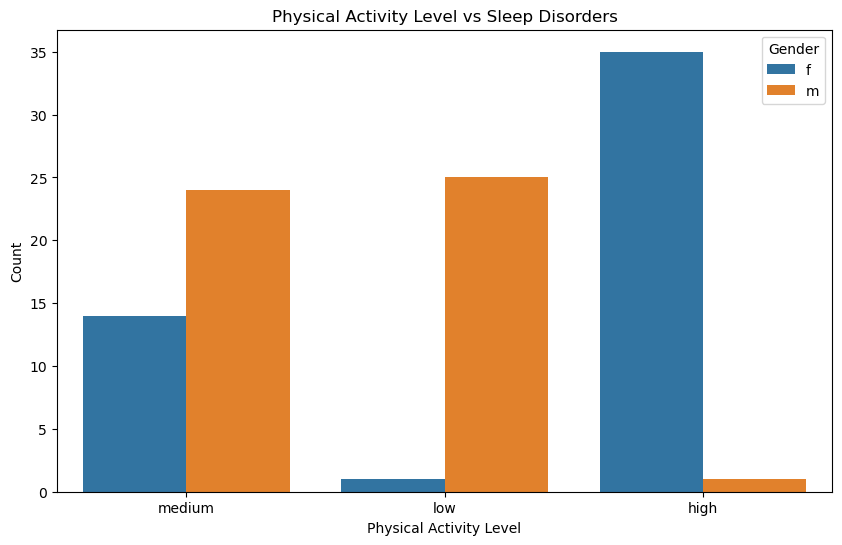

In [202]:
# 4. Countplot: Sleep Disorders by Physical Activity Level, segmented by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Physical Activity Level', hue='Gender')
plt.title("Physical Activity Level vs Sleep Disorders")
plt.xlabel("Physical Activity Level")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()


This code produces a count plot showing the distribution of physical activity levels `(Physical Activity Level)` by gender. `sns.countplot` creates a bar for each level of physical activity, segmented by gender. The `hue='Gender'` argument distinguishes male and female counts within each activity level using different colors. The plot’s title and labels are set with `plt.title`, `plt.xlabel`, and `plt.ylabel`, while `plt.legend` provides a legend explaining the color coding for gender.

**Interpretation:**

The count plot shows that both genders are well-represented across activity levels, though there may be notable differences in distribution. For instance, males and females may participate equally at certain activity levels, while differences in counts could suggest varying tendencies towards higher or lower activity levels within each gender. This distribution provides insights into gender-specific health behaviors, potentially guiding targeted interventions to balance physical activity levels among groups with lower engagement.

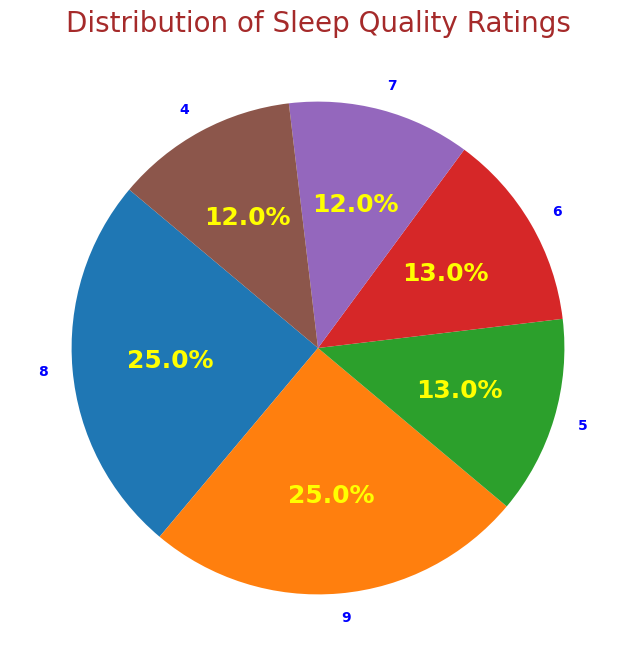

In [210]:
sleep_quality = df_new['Sleep Quality'].value_counts(normalize=True) * 100
# Plotting
plt.figure(figsize=(8, 8))
# plt.pie(sleep_quality, labels=sleep_quality.index, autopct='%1.1f%%', startangle=140, textprops={'color': 'yellow', 'fontweight': 'bold', 'fontsize': 18})
wedges, texts, autotexts = plt.pie(sleep_quality, labels=sleep_quality.index, autopct='%1.1f%%', startangle=140)

for text in texts:
    text.set_color("blue")          
    text.set_fontsize(10)   
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color("yellow")    
    autotext.set_fontsize(18)       
    autotext.set_fontweight("bold")
plt.title('Distribution of Sleep Quality Ratings', color = 'brown', fontsize = 20 )
plt.show()

This code generates a pie chart to show the distribution of sleep quality ratings as percentages. First, `sleep_quality` calculates the percentage distribution of each unique value in Sleep Quality using `value_counts(normalize=True) * 100`. `plt.pie` then creates the pie chart, displaying each category’s proportion with labels and setting colors and font sizes for improved readability. The `autopct='%1.1f%%'` argument formats each slice’s percentage, and `startangle=140` rotates the chart for optimal orientation. Finally, `plt.title` provides a descriptive title.

**Interpretation:**

The pie chart reveals the breakdown of sleep quality ratings among participants. For instance, a high percentage in the upper sleep quality ratings suggests that most individuals report good sleep quality, reflecting a generally healthy sleep pattern in the dataset. Conversely, if lower ratings constitute a significant portion, it highlights a need for improved sleep quality interventions among certain demographics. This visualization offers a quick overview of how participants perceive their sleep quality, aiding in understanding potential links between sleep quality and other health metrics.








___
#### Part 5: Conclusions

**Summary of Findings**

Our analysis of the Health and Sleep dataset uncovered several noteworthy patterns and relationships between age, physical activity, sleep duration, sleep quality, and other health indicators:

**1. Age and Physical Activity**

The data showed a clear pattern of decreasing physical activity with age. Specifically, the younger `18-30` age group had the highest average daily steps, reflecting higher activity levels. This trend diminishes progressively in older groups, with individuals aged 45-60 and 60+ showing the lowest daily step averages. This decrease in activity might be attributed to age-related changes in lifestyle, physical capability, and overall health, suggesting that younger individuals are more engaged in physical activities, which could positively impact their sleep quality and calorie burn. This insight highlights the importance of encouraging physical activity in older age groups to maintain health and mobility.

 **2. Relationship Between Daily Steps and Calories Burned**
    
The analysis confirmed a strong positive correlation between daily steps and calories burned. Individuals with higher step counts consistently burned more calories, underscoring physical activity's role in energy expenditure. Gender segmentation revealed that, on average, males burned slightly more calories than females for the same step count, likely due to differences in body composition and basal metabolic rate. This trend suggests that maintaining an active lifestyle, regardless of gender, is beneficial for calorie management and can support overall health. Additionally, this relationship reinforces that tracking daily steps can be a straightforward way for individuals to estimate their calorie expenditure.

**3. Sleep Duration and Sleep Quality**

Longer sleep duration was generally associated with higher sleep quality, as those who slept more hours tended to rate their sleep quality better. However, a notable subset of individuals experienced low sleep quality despite longer sleep durations, potentially indicating issues such as sleep disorders, poor sleep environments, or other health conditions that affect sleep depth and restfulness. This finding suggests that while sufficient sleep duration is essential, sleep quality is influenced by additional factors that might need to be addressed, such as reducing sleep disturbances or improving sleep hygiene.

**4. Impact of Physical Activity Level on Sleep Disorders**

The countplot analysis revealed that individuals with higher physical activity levels reported fewer sleep disorders, suggesting a potential link between regular exercise and improved sleep health. Interestingly, gender differences were observed, with males more frequently participating in higher physical activity levels than females, which may contribute to fewer reported sleep issues among men. This pattern supports the idea that regular physical activity can enhance sleep by reducing disruptions and potentially improving sleep depth and duration. These findings align with research suggesting that physical activity positively influences sleep health, making it an important factor to promote across all age groups.

**5. Distribution of Sleep Quality Ratings**

The pie chart visualization showed that most individuals rated their sleep quality as moderate to high, with fewer reporting very low or poor sleep quality. This distribution suggests that while the majority of individuals in the dataset have a relatively positive perception of their sleep, there remains a segment of the population experiencing suboptimal sleep quality. Given that sleep quality significantly impacts mood, productivity, and overall health, identifying the factors that affect sleep quality could be beneficial. For instance, targeted interventions might be needed for individuals experiencing consistently low sleep quality despite adequate sleep duration, as they may be facing underlying sleep or health issues that need attention.

**Suggested Next Steps**

Based on these findings, the following steps could further refine and expand our understanding of sleep and health relationships:

**1. In-depth Lifestyle Analysis:**

Expanding the dataset to include more lifestyle factors, such as stress levels, dietary habits, caffeine or alcohol consumption, and screen time before bed, could offer additional insights into variables that influence sleep quality and duration. Understanding how these factors impact sleep could lead to more targeted recommendations for sleep improvements.

**2. Temporal Analysis of Sleep Patterns:**

Analyzing sleep patterns over time, such as examining changes in sleep quality and duration across weeks or months, could help identify the effects of sleep consistency on overall health. Investigating whether individuals with regular sleep schedules experience better health outcomes than those with irregular sleep patterns would provide a deeper understanding of sleep hygiene’s impact.

**3. Targeted Interventions for Low Sleep Quality:**

Since a subset of individuals reported low sleep quality despite longer sleep durations, further investigation could be focused on this group. Exploring whether specific interventions—such as creating a sleep-friendly environment, introducing relaxation techniques, or adjusting bedtime routines—could improve their sleep quality would be a valuable next step.

**4. Detailed Age-Based Sleep Analysis:**

A more focused comparison of sleep trends among specific age groups, particularly older age groups, could provide insights into age-related sleep challenges. Understanding how sleep quality and duration change as people age may help guide public health recommendations on maintaining sleep health through different life stages.

These findings underscore the significant role of sleep, physical activity, and health-related behaviors in shaping overall wellness. By addressing sleep quality and encouraging physical activity, individuals and health professionals can work toward improved health outcomes and quality of life.






